<h1 style="color:darkblue">Teoría del Portafolio Moderna</h1>

### Introducción.
También conocida como "Mean-Variance Portfolio Theory", este modelo asume que lo único que se necesita para explicar los rendimientos de un portafolio son la media y la varianza de cada una de las acciones, al menos que se cuente con una función especial. Esta teoria supone que los retornos se distribuyen de forma normal.



Sea $P$ un portafolio compuesto por las diferentes acciones $P=\{ X_0, X_1, ... , X_n \}$, la teoría del porafolio busca el porcentaje de dinero que se tendria que invertir en cada una de las acciones ($weight$) de tal forma que los rendimientos del portafolio $r$ sean los máximos y que el riesgo $\sigma$ sea el mínimo. 

<img src="Images/MPT.PNG">

### Descripción Formal

Sean: 
- $P$: Un portafolio de inversión.
- $ X_0, X_1, ... , X_n$: las acciones del portafolio.
- $w_i$: la ponderación o porcentaje de dinero a invertir en la accion $X_i$.
- $r_i$: la tasa de ganancia o retorno de la accion $X_i$.
- $\sigma_i^2$: la varianza de la acción $X_i$.
- $\sigma_i$: la volatilidad o riesgo de la accion $X_i$.
- $\sigma_p^2$: la varianza del portafolio $P$.
- $\sigma_p$: la volatilidad o riesgo del portafolio $P$.

<br>

Lo que el problema busca hacer es:
<h3> $ Minimizar: \space \sigma^2 = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \sigma_{ij}  $ </h3>

<br>

Dadas las condiciones:
> 1) La suma de las ponderaciones es igual a 1:
>
> $\sum_{i}^{n} w_i = 1 $
>
> 2) Cada ponderación multiplicada por su respectiva acción determina los retornos del portafolio:
>
> $\sum_{i}^{n} w_i r_i = r_p $


In [1]:
#Librerias usadas
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd
import numpy as np

In [2]:
#Microsoft, Amazon, Testla, Apple, Facebook & Google
stocks = ["MSFT", "AMZN", "TSLA", "AAPL", "FB", "GOOGL"]

#Datos del 01/01/2016 al 07/02/2020
data = web.DataReader(stocks, data_source="yahoo", start="01/01/2016")["Adj Close"]

#Precios
prices = pd.DataFrame(data)

#Retornos
returns = prices.pct_change()
returns = pd.DataFrame(returns)

In [3]:
prices.tail()

Symbols,AAPL,AMZN,FB,GOOGL,MSFT,TSLA
Date,,,,,,
2020-06-26,353.630005,2692.870117,216.080002,1362.540039,196.330002,959.739990
2020-06-29,361.779999,2680.379883,220.639999,1397.170044,198.440002,1009.349976
2020-06-30,364.799988,2758.820068,227.070007,1418.050049,203.509995,1079.810059
2020-07-01,364.109985,2878.699951,237.550003,1442.000000,204.699997,1119.630005
2020-07-02,364.109985,2890.300049,233.419998,1469.930054,206.259995,1208.660034


In [4]:
returns.tail()

Symbols,AAPL,AMZN,FB,GOOGL,MSFT,TSLA
Date,,,,,,
2020-06-26,-0.030726,-0.022403,-0.083164,-0.054514,-0.020016,-0.026613
2020-06-29,0.023047,-0.004638,0.021103,0.025416,0.010747,0.051691
2020-06-30,0.008348,0.029265,0.029143,0.014944,0.025549,0.069807
2020-07-01,-0.001891,0.043453,0.046153,0.016889,0.005847,0.036877
2020-07-02,0.000000,0.004030,-0.017386,0.019369,0.007621,0.079517


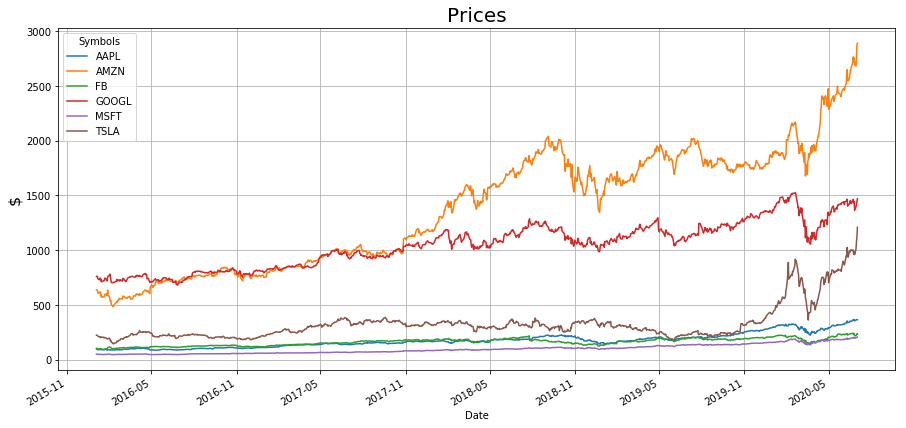

In [7]:
#Gráfica de Precios
prices.plot(figsize=(15,7))
plt.title("Prices", fontsize=20)
plt.ylabel("$",fontsize=16)
plt.grid()
plt.show()

In [8]:
#Estadísticas Básicas de los retornos diarios
returns.describe()

Symbols,AAPL,AMZN,FB,GOOGL,MSFT,TSLA
count,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
mean,0.001326,0.001509,0.000939,0.000720,0.001397,0.002084
std,0.018194,0.018612,0.020354,0.016487,0.017285,0.034458
min,-0.128647,-0.079221,-0.189609,-0.116342,-0.147390,-0.185778
25%,-0.005716,-0.006439,-0.006908,-0.005619,-0.005412,-0.013959
50%,0.001001,0.001645,0.001187,0.001131,0.001283,0.000985
75%,0.009452,0.010024,0.010764,0.008813,0.008903,0.017629
max,0.119808,0.132164,0.155214,0.096202,0.142169,0.198949


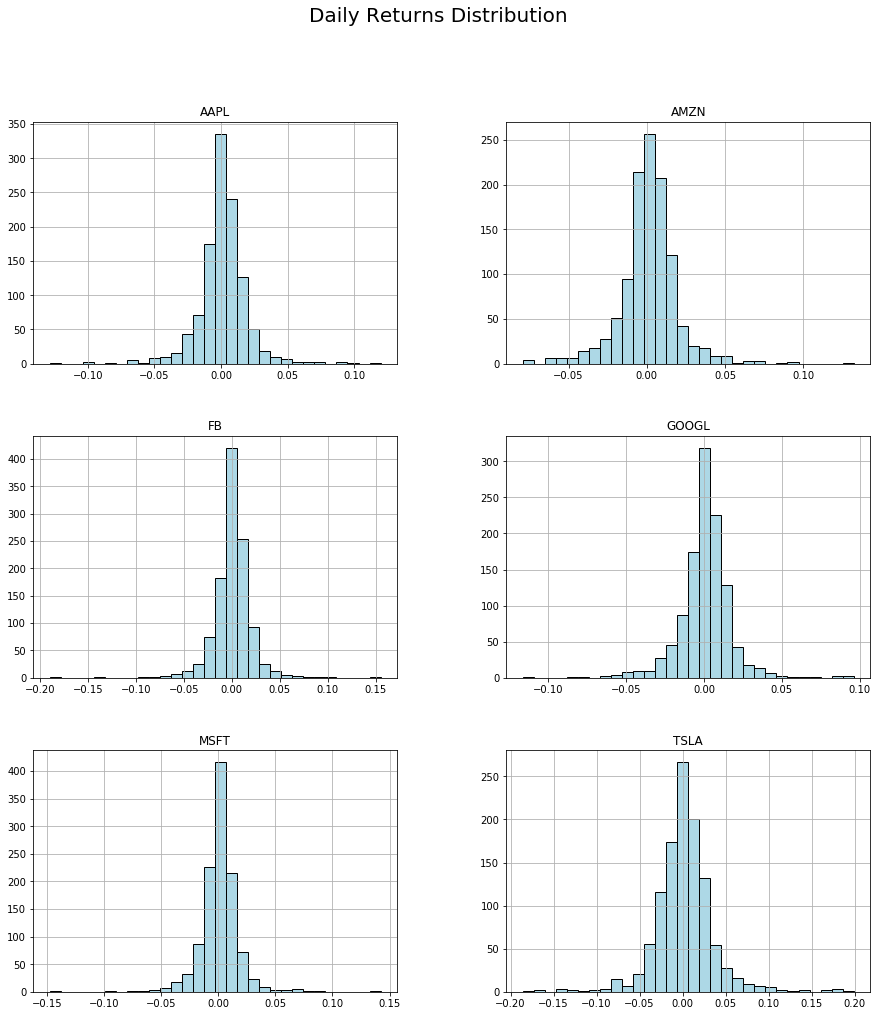

In [10]:
#Distribución de los retornos
returns.hist(figsize=(15,16), color="lightblue", ec="black", bins=30)
plt.suptitle("Daily Returns Distribution", fontsize=20)
plt.show()

In [11]:
#Retornos Mensuales
m_ret = prices.resample('M').ffill().pct_change()

#Estadísticas Mensuales
m_ret.describe()

Symbols,AAPL,AMZN,FB,GOOGL,MSFT,TSLA
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,0.029335,0.033026,0.016616,0.014033,0.027694,0.045890
std,0.080951,0.080324,0.079525,0.060456,0.051952,0.158843
min,-0.181198,-0.202192,-0.133371,-0.132388,-0.097049,-0.224266
25%,-0.015189,-0.013831,-0.040191,-0.021081,-0.001136,-0.050097
50%,0.046262,0.037780,0.014658,0.017738,0.027082,0.032895
75%,0.083209,0.080213,0.056740,0.054579,0.060966,0.117806
max,0.200422,0.268900,0.271569,0.159000,0.136326,0.555160


In [12]:
print("Normality Test \n")

for i in range(len(m_ret.columns)):
    nt = ss.normaltest(m_ret.iloc[:,i].dropna())
    pval = round(nt[1]*100,3)
    print(m_ret.columns[i], "p-value:", str(pval) + "%" )

Normality Test 

AAPL p-value: 35.414%
AMZN p-value: 9.009%
FB p-value: 1.064%
GOOGL p-value: 98.509%
MSFT p-value: 74.889%
TSLA p-value: 0.316%


> Entre más grande sea el periodo en el que se haga el test de normalidad, más significativo este resulta. En periodos mensuales solamente las acciones de facebook y tesla no parecen distribuirse de forma normal, violando el supuesto de la toría.

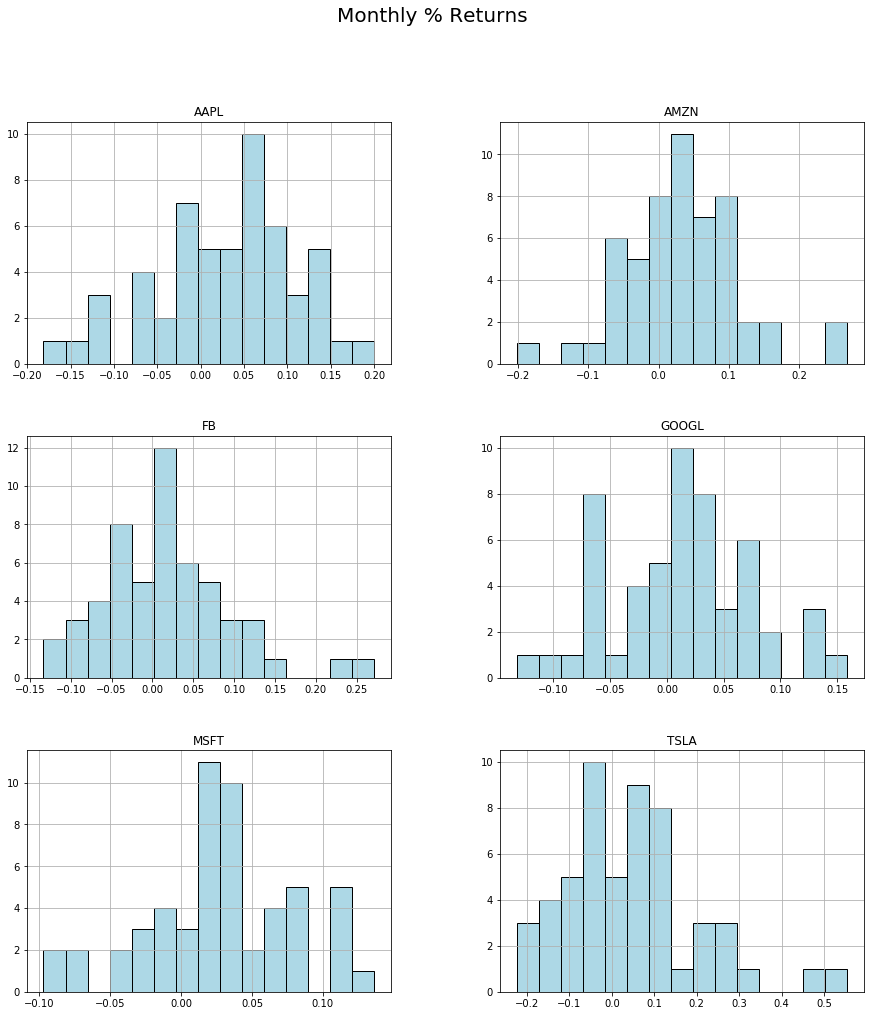

In [14]:
m_ret.hist(figsize=(15,16), color="lightblue", ec="black", bins=15)
plt.suptitle('Monthly % Returns', fontsize=20)
plt.show()

In [22]:
#Posibles portafolios 

#prets = portfolio returns, pvols = portfolio volatility
prets = []
pvols = []

#6 empresas, v = 6
v = len(returns.columns)

for i in range(2000):
    
    #Ponderación del portafolio para las v empresas
    weights = np.random.random(v)
    weights /= np.sum(weights)
    
    #retorno de las v empresas para 252 días de trading
    prets.append(np.sum(returns.mean() * weights *252))
    
    #riesgo de las v empresas
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() *252, weights))))

prets = np.array(prets)
pvols = np.array(pvols)

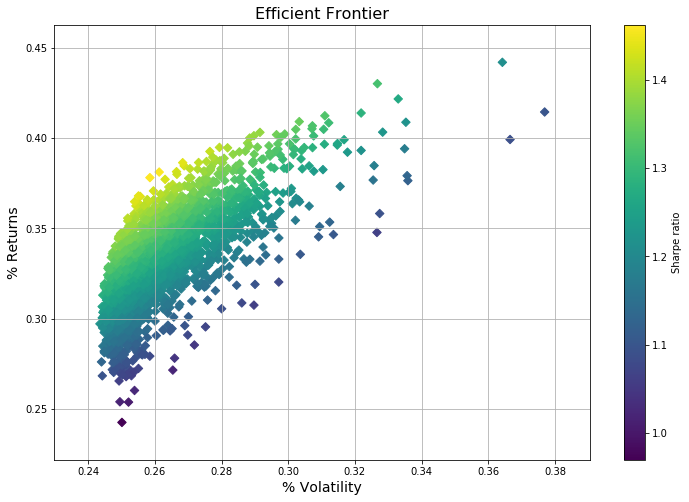

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(pvols, prets, c=(prets/pvols), marker="D", cmap="viridis")
plt.title("Efficient Frontier", fontsize=16)
plt.xlabel("% Volatility", fontsize=14)
plt.ylabel("% Returns", fontsize=14)
plt.colorbar(label='Sharpe ratio')
plt.grid()
plt.show()

In [29]:
#Estadisticas básicas
def stats(weights):
    weights = np.array(weights)
    #Retornos promedios anuales
    pret = np.sum(returns.mean() * weights *252)
    #Volatilidad Anual
    pvol = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    #Retornos, Volatilidad & Sharpe Ratio del Portafolio
    return np.array([pret, pvol, pret / pvol])


#Función a Minimizar
def min_func_sharpe(weights):
    return -stats(weights)[2] #sharpe ratio

In [32]:
#constraints and bounds
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(v))

# Optimización con restricciones - Constraint optimization
import scipy.optimize as so
optim = so.minimize(min_func_sharpe, v * [1 / v,], method='SLSQP',
                    bounds=bnds, constraints=cons)
optim

     fun: -1.4786665595636432
     jac: array([-5.96806407e-04,  6.82801008e-04,  3.30107450e-01,  4.68750954e-01,
       -4.76181507e-04, -2.18465924e-04])
 message: 'Optimization terminated successfully.'
    nfev: 50
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([1.67793158e-01, 3.95666374e-01, 7.91110824e-17, 0.00000000e+00,
       2.94690843e-01, 1.41849626e-01])

In [34]:
#Ponderaciones optimas
w = optim.x.round(5)

print("Ponderaciones Optimas: \n")
for i in range(len(w)):
    print(returns.columns[i],"w:" , str(w[i])+"%")

Ponderaciones Optimas: 

AAPL w: 0.16779%
AMZN w: 0.39567%
FB w: 0.0%
GOOGL w: 0.0%
MSFT w: 0.29469%
TSLA w: 0.14185%


In [35]:
#Retornos, Volatilidad y Sharpe Ratio del Portafolio
stats(w)

array([0.38484078, 0.26026204, 1.47866656])

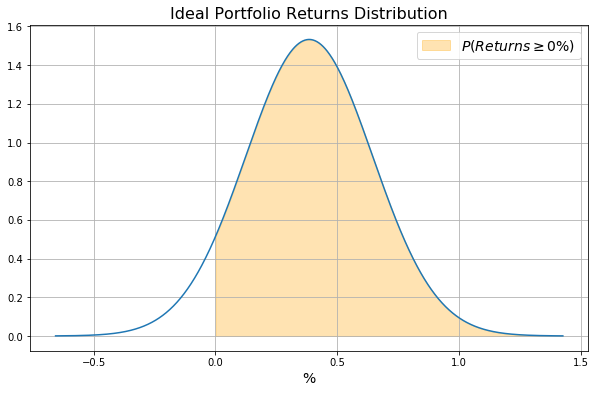

In [39]:
#Datos a graficar
ret = stats(w)[0]
vol = stats(w)[1]

x_min = ret - 4*vol
x_max = ret + 4*vol

x = np.linspace(x_min, x_max, 1000)
y = ss.norm.pdf(x, ret, vol) #normal pdf wit mu = ret & sigma = vol

#Gráfica
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.fill_between(x,y, where=[(x>=0) for x in x],
                 label="$P(Returns \geq 0\%)$",
                alpha=0.30, color="orange")
plt.title("Ideal Portfolio Returns Distribution", fontsize=16)
plt.xlabel("%", fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [41]:
print("Probability of having returns >= 0%")
P = 1 - ss.norm.cdf(0,ret, vol)
print(round(P,5) )

Probability of having returns >= 0%
0.93039


> Teoricamente, la probabilidad de que al invertir en un periodo anual con el portafolio escogido las ganancias sean superiores a cero es del 93%.

In [42]:
import seaborn as sns

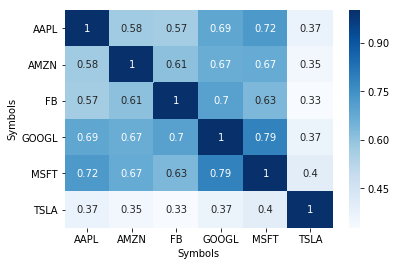

In [47]:
sns.heatmap(returns.corr(), annot=True, cmap="Blues")

# Fuentes

- Codingfinance.com (2018) How to calculate stock returns in Python (written by DD). Consultado el 4 de julio de 2020 de: https://www.codingfinance.com/post/2018-04-03-calc-returns-py/
- Hilpisch Y. (2015) Portfolio Optimization (Ch. 11 Statistics) Python for Finance: Analyze Big Financial Data. O'Reily. ISBN: 978-1-491-94528-5
- Wang J. (2006) Portfolio Theory (Ch. 7) Lecture Notes. Consultado el 4 de julio de 2020 de: https://www.its.caltech.edu/~rosentha/courses/BEM103/Readings/JWCh07.pdf